In [1]:
import sys
sys.path.insert(0, "/Users/nicoladilillo/Projects_mac/lettuce_spectral_signature")
from cars_model import CARS
import os

In [2]:
# extract the name of the file
col_group = ['Date', 'Class', 'Stress_weight', 'Position']
file_name = '10_SG_SVN/GA-iPLS_BOSS'
path = os.path.join(os.path.abspath(os.getcwd()), file_name)
c = CARS(path, MAX_COMPONENTS=10, col_group=col_group, calibration=False, cutoff=0.5)

Training samples: 157
	Class Healty: 82 samples
	Class Unhealty: 75 samples
Testing samples: 39
	Class Healty: 20 samples
	Class Unhealty: 19 samples


In [3]:
w = c.compute_survived_wavelengths_best_score_single()
c.plot_survived_df

Best accuracy for run 14 and iteration 658
Best accuracy = 0.9230769230769232


,Wavelengths,count
0,421.000,1.0
1,422.000,0.0
2,423.000,0.0
3,424.000,0.0
4,425.000,0.0
...,...,...
814,2390.000,0.0
815,2391.000,1.0
816,2392.000,0.0
817,2393.000,0.0


['1008.000', '1039.000', '1041.000', '1092.000', '1093.000', '1102.000', '1109.000', '1164.000', '1165.000', '1171.000', '1184.000', '1190.000', '1222.000', '1225.000', '1228.000', '1229.000', '1233.000', '1234.000', '1245.000', '1253.000', '1284.000', '1299.000', '1300.000', '1303.000', '1304.000', '1318.000', '1388.000', '1424.000', '1425.000', '1461.000', '1485.000', '1486.000', '1490.000', '1494.000', '1500.000', '1518.000', '1525.000', '1530.000', '1546.000', '1556.000', '1566.000', '1573.000', '1577.000', '1590.000', '1596.000', '1729.000', '1736.000', '1738.000', '1791.000', '1792.000', '1895.000', '1909.000', '1976.000', '1995.000', '2005.000', '2006.000', '2007.000', '2015.000', '2062.000', '2064.000', '2070.000', '2113.000', '2200.000', '2202.000', '2217.000', '2221.000', '2341.000', '2345.000', '2346.000', '2347.000', '2388.000', '2391.000', '2394.000', '421.000', '437.000', '441.000', '526.000', '529.000', '537.000', '573.000', '580.000', '586.000', '715.000', '719.000', '7

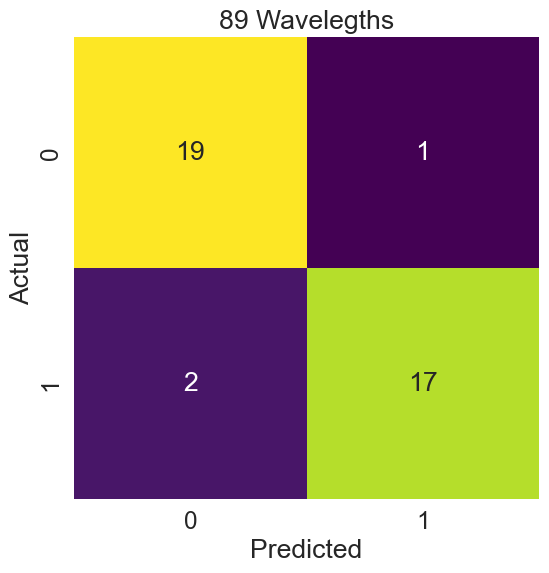

In [4]:
a, l, y_pred = c.accuracy_survived_wavelenghts(thr=None, rdm=False, all=False, model_type='PLS', wavelengths=[w], learning_curve=False, pls_plot=False, peak_detection=False, confusion_matrix_f=True)

In [5]:
# for i in l:
#     print(len(i))
#     c.permutation_test(wavelengths=i)

In [6]:
import numpy as np
import pandas as pd

# Step 1 & 2: Find indices where predictions differ from true values
diff_indices = np.where(y_pred != c.y_test_2.flatten())[0]
# print(diff_indices)

# Step 3: Extract corresponding rows from c.df_test_2
diff_rows = c.df_test_2.iloc[diff_indices]

# Step 4: Filter rows where class is 'Uhealty'
stress_rows = diff_rows[diff_rows.index.get_level_values('Class') == 'Unhealty']

# Step : Extract 'Stress_weight' column
stress_weights = stress_rows.index.get_level_values('Stress_weight')

# If you want to print or return the results
print("Mismatched:", diff_rows.index.tolist())
print("Corresponding Stress_weight values:\n", stress_weights)

Mismatched: [('20-Jun-2023', 'Healty', 40, 97), ('17-May-2023', 'Unhealty', 20, 46), ('17-May-2023', 'Unhealty', 20, 51)]
Corresponding Stress_weight values:
 Index([20, 20], dtype='int64', name='Stress_weight')
